# 14. Трансформация Фурье

(432, 650, 2)


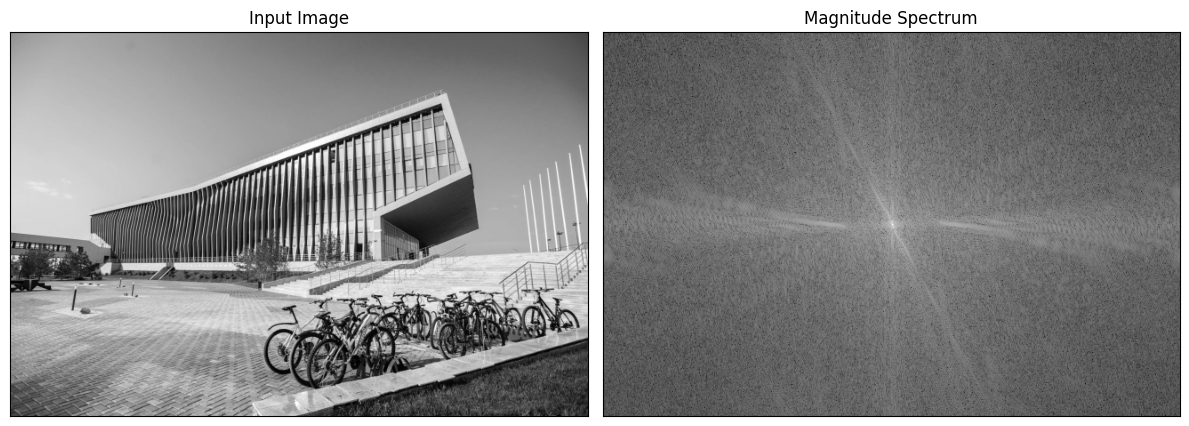

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('IU.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
print(dft.shape)


fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
ax[0].set(xticks=[],yticks=[],title='Input Image')
ax[1].set(xticks=[],yticks=[],title='Magnitude Spectrum')
ax[0].imshow(img, cmap = 'gray')

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

ax[1].imshow(magnitude_spectrum, cmap = 'gray')
fig.tight_layout()
plt.show()

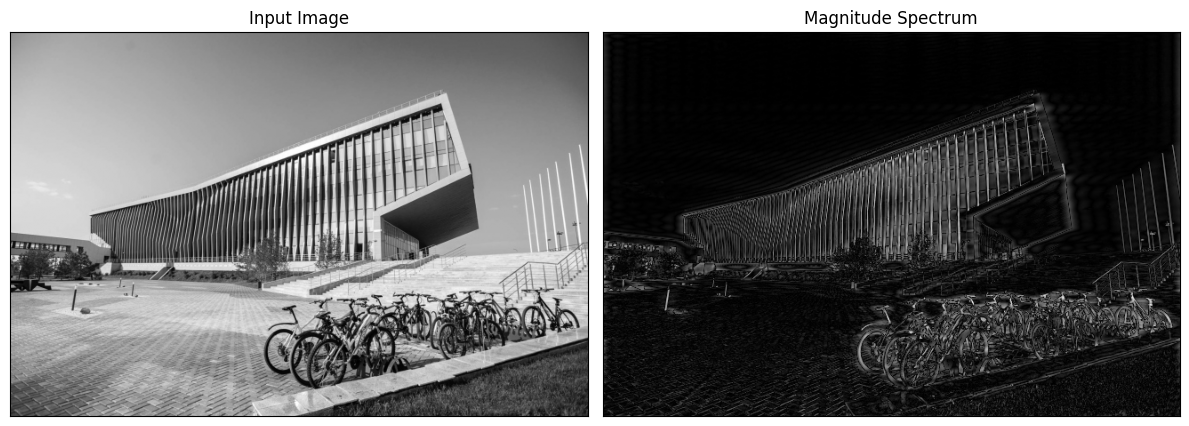

In [11]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2

mask = np.ones((rows,cols,2),np.uint8)
mask[crow-50:crow+50, ccol-20:ccol+20] = 0

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
ax[0].set(xticks=[],yticks=[],title='Input Image')
ax[1].set(xticks=[],yticks=[],title='Magnitude Spectrum')
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(img_back, cmap = 'gray')
fig.tight_layout()
plt.show()